# Table of content
1.  Variable description 
2.  Importing the required libraries 
3.  Data importation 
5.  Data exploration
    * Univariate data analysis
    * Bivariate data analysis
6.  Task 2.1 Classical A/B Testing
5.  Task 2.2 Machine learning
    * Model I:Logistic Regression model
    * Model II:Decision tree model
    * Model III:XGoost model


###   Below is the Variable description
| variable         | description |
| ---------------- | ------------|
| `auction_id`     | The unique id of the online user who has been presented the BIO. |
| `experiment`     | The group the user belongs to - `exposed` or `control`. |
| `date`           | date in YYYY-MM-DD format. |
| `hour`           | hour of the day in HH format. |
| `device_make`    | name of the type of device the user has e.g. Samsung. |
| `platform_os`    | id of the OS the user has. |
| `browser`        | name of the browser the user uses to see the BIO questionnaire. |
| `yes`            | if the user chooses the `Yes` radio button for the BIO questionnaire. |
| `no`             | if the user chooses the `no` radio button for the BIO questionnaire. |

## Importing the required libraries

In [1]:
#!pip install xgboost

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set

import math as mt
from numpy import mean
from numpy import std
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import binom
import scipy.stats as stats
from statsmodels.stats import weightstats

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.style.use('ggplot')
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


## Data importation

In [71]:
#Importing the dataset.
ad_data = pd.read_csv("ABAdRecall.csv")

In [72]:
ad_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### Data understanding

In [73]:
#Checking the unique values for each variable
ad_data.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [74]:
# Checking the missing values
ad_data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [75]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB



## Data exploration
#### Value counts for categorical variables

In [7]:
# Variable :Experiment
experiemt_count = ad_data["experiment"].value_counts()

In [8]:
experiemt_count

control    4071
exposed    4006
Name: experiment, dtype: int64

In [9]:
# Variable :device_make
device_make_count = ad_data["device_make"].value_counts()

In [10]:
device_make_count.head()

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Name: device_make, dtype: int64

In [11]:
# Variable :browser
browser_count = ad_data["browser"].value_counts()

In [12]:
browser_count.head()

Chrome Mobile            4554
Chrome Mobile WebView    1489
Samsung Internet          824
Facebook                  764
Mobile Safari             337
Name: browser, dtype: int64

In [13]:
## aggregate of yes and no in the experiment.
agg_response = ad_data.groupby(["experiment"]).agg({"yes": [sum],"no": [sum]})

In [14]:
## naming the columns
agg_response.columns = ["yes","no"]

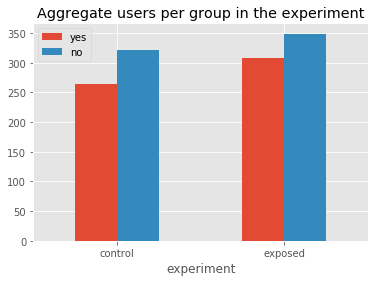

In [15]:
agg_response.plot(kind= "bar")
plt.title("Aggregate users per group in the experiment")
plt.xticks(rotation = 0)
plt.savefig("Aggregate user's per group in the experiment.png")
plt.show()

Observation:The exposed group is more aware of the Smart ad brand compared to the control group

## Univariate data analysis


### Distribution of device make

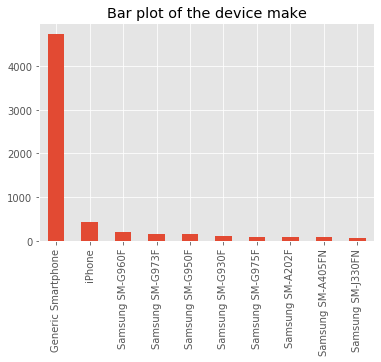

In [16]:
# Variable : device_make
device_make_data = ad_data["device_make"].value_counts()[:10]
device_make_data.plot(kind = "bar")
plt.title("Bar plot of the device make")
plt.savefig("Device make.png")
plt.show()

Observation: Most of the users who accessed the site used the generic smart phone most followed by iphone users and sumsung device users.

### Distribution of experiment group

Text(0.5, 1.0, 'Count plot of the groups in the experiment')

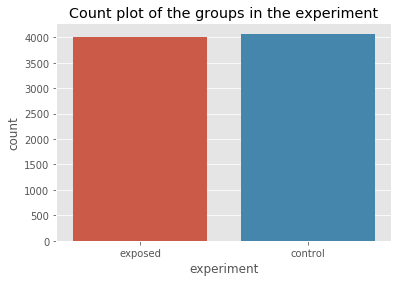

In [17]:
# Variable : Experiment
sns.countplot(x="experiment",data = ad_data)
plt.title("Count plot of the groups in the experiment")

Observation: The control group and the exposed group are almost equally represented in the experiment

### Distribution of the user's browser

Text(0.5, 1.0, 'Bar plot of the browser')

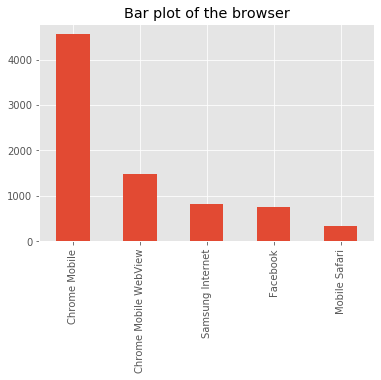

In [18]:
# Variable : browser
browser_count_data = ad_data["browser"].value_counts()[:5]
browser_count_data.plot(kind = "bar")
plt.title("Bar plot of the browser")

Observation: Most of the users who accessed the site used the chrome mobile browser followed by chrome mobile webview

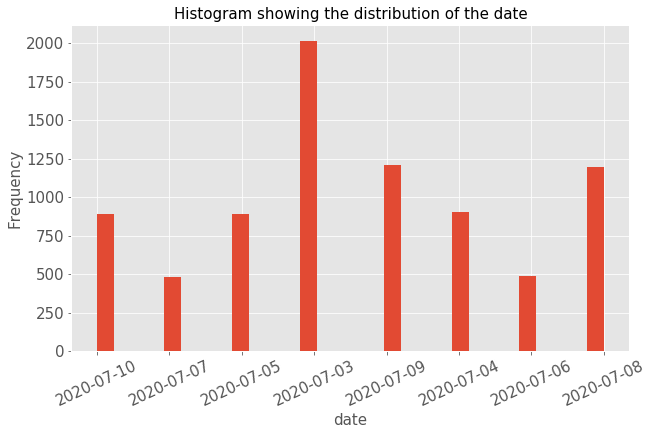

In [19]:
hour = ad_data['date']
plt.figure(figsize=[10,6])

plt.hist(hour,bins = 30)
plt.xlabel('date',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram showing the distribution of the date',fontsize=15)
plt.xticks(rotation = 25)
plt.show()

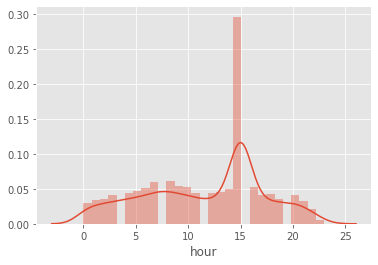

In [21]:
sns.distplot(ad_data['hour'])
plt.savefig("hour.png")
plt.show()

## Bivariate data analysis

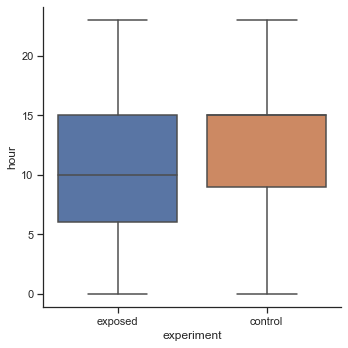

In [22]:
# boxplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.catplot(x="experiment", y="hour", kind="box", data=ad_data)

Splitting the dataset per the group in experiment
The dataset is split into two categories; one with the control group and the other one in exposed group

In [23]:
control_ad_data = ad_data[ad_data["experiment"] == "control"]

In [24]:
control_ad_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [25]:
exposed_ad_data = ad_data[ad_data["experiment"] == "exposed"]

In [26]:
exposed_ad_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


# Classical A/B Testing 
In this approach,we use p-values to measure the significance of the experimental feature (being exposed to an ad in our case)  over the null hypothesis (the hypothesis that there is no difference in brand awareness between the exposed and control groups in the current case).

 `Null hypothesis, H0`            No significance difference in brand awareness between the exposed and control groups. 

 `Alternative hypothesis, Ha`     Significance difference in brand awareness between the exposed and control groups. 


In [27]:
'''
Finding the click rates for both control group and exposed group.
Click is the sum of yes for both variants. 
'''
num_control_group, num_exposed_group = control_ad_data['yes'].count(), exposed_ad_data['yes'].count()
click_control_group, click_exposed_group = control_ad_data['yes'].sum(), exposed_ad_data['yes'].sum() 
rate_control_group, rate_exposed_group = click_control_group / num_control_group, click_exposed_group / num_exposed_group

In [28]:
print("Click rates in control group: {:.3f}".format(rate_control_group))

Click rates in control group: 0.065


In [29]:
print("Clicks rates in exposed group: {:.3f}".format(rate_exposed_group))

Clicks rates in exposed group: 0.077


### Estimating the click rate using the sample.

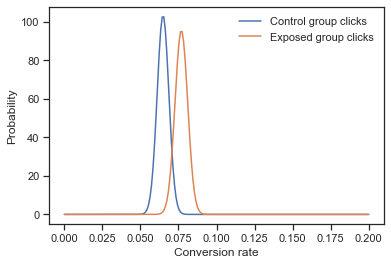

In [30]:
std_ctrl_grp = np.sqrt(rate_control_group * (1 - rate_control_group) / num_control_group)
std_exp_grp = np.sqrt(rate_exposed_group * (1 - rate_exposed_group) / num_control_group)

click_rate = np.linspace(0, 0.2, 200)
prob_ctrl_grp_clicks = norm(rate_control_group, std_ctrl_grp).pdf(click_rate)
prob_exp_grp_clicks = norm(rate_exposed_group, std_exp_grp).pdf(click_rate)

# Creating bar plots
plt.plot(click_rate, prob_ctrl_grp_clicks, label="Control group clicks")
plt.plot(click_rate, prob_exp_grp_clicks, label="Exposed group clicks")
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

plt.show()

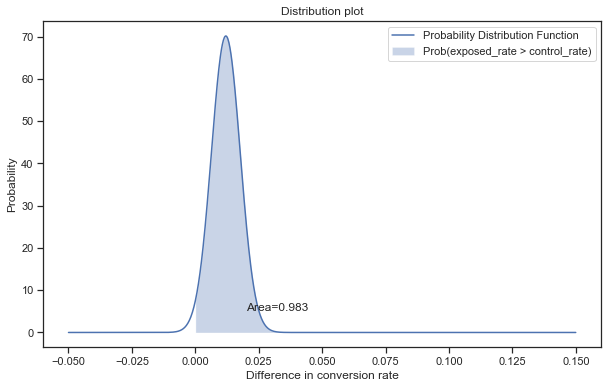

zscore is 2.117, with p-value 0.017


In [31]:
z_score = (rate_exposed_group - rate_control_group) / np.sqrt(std_ctrl_grp**2 + std_exp_grp**2)
p = norm(rate_exposed_group - rate_control_group, np.sqrt(std_ctrl_grp**2 + std_exp_grp**2))



x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.figure(figsize=(10,6))
plt.plot(x, y, label="Probability Distribution Function")
plt.fill_between(x, 0, y, where=x>0, label="Prob(exposed_rate > control_rate)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Probability")
plt.title("Distribution plot")
plt.savefig("Classical model.png")
plt.show()

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

### Conclusion
As this is a significant result, (typically p < 5%), we reject the null hypothesis, and state that there is a significant difference in the conversion rate between the dummy ad and creative ad.
Users who are shown the creative ad are more aware of the brand than users who are shown the dummy ad. 

<strong>Note</strong>: This is a one-tailed test - the question we've asked is if users exposed group are more aware of the brand than the users in control group.

### Obtaining the p-value(significance)

In [32]:
'''
This function is useful in determining the p-value(significance).
'''
def get_confidence_value(click_a, num_a, click_b,  num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.cdf(z_score)

In [33]:
confidence_value = get_confidence_value(click_control_group, num_control_group, click_exposed_group, num_exposed_group)
print("Confidence value is:", confidence_value)

Confidence value is: 0.9824645920271491


# Task 2.2 Machine learning

Now the Target variable is computed from the group of people who had engagement with the smart ad 

In [34]:
'''
This condition assigns code 1 to the individuals who said yes to knowing the smart ad brand, 
assigns code 0 to the individuals who said yes to knowing the smart ad brand and code 2 to the individuals with zero engagement.
'''
condition_1 = [
    (ad_data['yes'] == 1) & (ad_data['no'] == 0),
    (ad_data['yes'] == 0) & (ad_data['no'] == 1),
    (ad_data['yes'] == 0) & (ad_data['no'] == 0)]

values = [1, 0, 2]

ad_data['target_value'] = np.select(condition_1, values)

In [35]:
'''
This conditions assigns code 0 to the individuals who said yes to knowing the smart ad brand, 
assigns code 0 to the individuals who said yes to knowing the smart ad brand and code 2 to the individuals with zero engagement.
'''
condition_2 = [
    (ad_data['hour'] >= 0 ) & (ad_data['hour'] < 6),
    (ad_data['hour'] >= 6 ) & (ad_data['hour'] < 12),
    (ad_data['hour'] >= 12 ) & (ad_data['hour'] < 18),
    (ad_data['hour'] >= 18 ) & (ad_data['hour'] <= 23)
]

values = [0, 1, 2, 3]

ad_data['day_part'] = np.select(condition_2, values)

#### Label encoding
Before creating a model , we need to convert to a real number because sklearn machine learning functions only death with real numbers.
We can convert a categorical variable like into a number using the sklearn preprocessing function LabelEncoder():

In [36]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert more variables to numeric
ad_data["encoded_date"] = label_encoder.fit_transform(ad_data["date"])
ad_data["encoded_experiment"] = label_encoder.fit_transform(ad_data["experiment"])
ad_data["encoded_devicemake"] = label_encoder.fit_transform(ad_data["device_make"])
ad_data["encoded_browser"] = label_encoder.fit_transform(ad_data["browser"])

#### Dropping the variables which are of not relevance in modelling the target variable

In [37]:
machinelearning_df = ad_data.drop(['auction_id','hour','yes','no','experiment','date','device_make','browser'], 1)

In [38]:
# rearranging columns
machinelearning_df = machinelearning_df[['encoded_experiment', 'encoded_devicemake', 'encoded_browser', 'platform_os', 'encoded_date', 
               'day_part', 'target_value']]

In [39]:
#machinelearning_df.drop(machinelearning_df.loc[machinelearning_df['target_value'] == 2].index, inplace=True)

### Exploratory Analysis for the feature variables

In [40]:
''' 
This time we will plot a correlation matrix, to determine the relationships between the different variables.
This matrix will give us a sense of how well the variables are correlated. By this we mean, whether an
increase or decrease in variable affects the other variable. 
'''
corrMatrix = machinelearning_df.corr()
corrMatrix

,encoded_experiment,encoded_devicemake,encoded_browser,platform_os,encoded_date,day_part,target_value
encoded_experiment,1.000000,-0.052660,-0.112328,0.102422,0.238998,-0.133750,-0.023837
encoded_devicemake,-0.052660,1.000000,0.596415,-0.584501,0.002795,-0.005789,0.025763
encoded_browser,-0.112328,0.596415,1.000000,-0.223611,-0.024858,0.032187,-0.008790
platform_os,0.102422,-0.584501,-0.223611,1.000000,0.008278,0.000445,-0.067638
encoded_date,0.238998,0.002795,-0.024858,0.008278,1.000000,-0.068064,0.016385
day_part,-0.133750,-0.005789,0.032187,0.000445,-0.068064,1.000000,0.014409
target_value,-0.023837,0.025763,-0.008790,-0.067638,0.016385,0.014409,1.000000


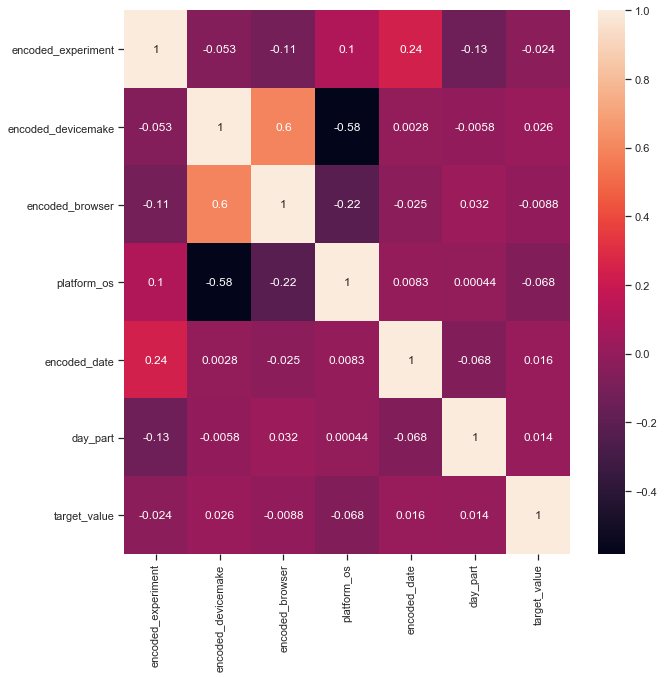

In [41]:
# We can plot a visualisation of the matrix for better clarity
plt.figure(figsize=(10, 10)) 
sns.heatmap(corrMatrix, annot = True) 

### Feature selection
Dividing the given columns into two types of variables dependent(target_value) and independent variable(or feature variables).

In [42]:
#split dataset in features and target variable
X = machinelearning_df.loc[:, machinelearning_df.columns != 'target_value']
y = machinelearning_df[["target_value"]]

#### Splitting the data
Training Dataset is the sample of data used to fit the model.Test Dataset is the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
Let's split the dataset by using function train_test_split().

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .1, random_state=25)

#### Definition of the functions used in the ML part

In [44]:
'''
A function that gets the perfomance score of the model
'''
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

'''
The RMSE is the square root of the variance of the residuals.
It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. 
Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit.
The function below is useful in calculating the metrics rmse and r-squared
'''
def calculate_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_sq = r2_score(y_test, y_pred)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    


'''
The function below is useful for plotting the original values and values predicted by the model
'''
def plot_preds(y_test, y_pred, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_pred, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('Observation')
    plt.ylabel('Engagement')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.savefig("XGBoost.png") #varies depwnding on the 
    plt.show()
    
   ### K-fold function 
def model_predictor(model, x, y):
    kf = KFold(n_splits = 5, random_state = 0, shuffle=True)
    for trainIndex, testIndex in kf.split(X_train):
        kfX_train, kfX_test = x.iloc[trainIndex], x.iloc[testIndex]
        kfy_train, kfy_test = y.iloc[trainIndex], y.iloc[testIndex]
        
        trained_model = model.fit(kfX_train, kfy_train)
    return trained_model

## Model I:Logistic Regression model

In [45]:
# instantiate model
logregression = LogisticRegression()

In [46]:
# training the model
logregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
result = get_score(logregression,X_train,X_test,y_train,y_test)

In [48]:
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 87.50%


#### k-fold Cross Validation using logistic regression
Now let's train a machine learning model using 5-fold cross validation.

In [49]:
'''
The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held-back test set, whilst all other folds collectively are used as a training dataset.
A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.
'''
logisticsreg_trained = model_predictor(logregression, X_train, y_train)

In [50]:
kfold_score = logisticsreg_trained.score(X_test,y_test)

In [51]:
# report performance:evaluate a logistic regression model using k-fold cross-validation
print("Accuracy: %.2f%%" % (kfold_score*100.0)) 

Accuracy: 87.50%


It is noted that the model achieved an estimated classification accuracy of about 87.0 percent.

In [52]:
y_pred_log = logisticsreg_trained.predict(X_test)

### plotting the original values and values predicted by the model

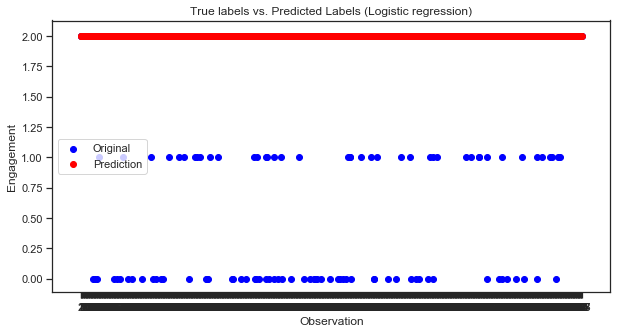

In [53]:
plot_preds(y_test,y_pred_log,"Logistic regression")

#### Evaluating  the performance of algorithm 

In [54]:
calculate_metrics(y_test, y_pred_log)

RMSE Score: 0.5865657729024035
R2_Squared: -0.1286277031915748


### Feature importance

In [55]:
# get importance
importance = logregression.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10680
Feature: 1, Score: -0.00125
Feature: 2, Score: 0.00925
Feature: 3, Score: -0.09927
Feature: 4, Score: -0.01528
Feature: 5, Score: -0.02044


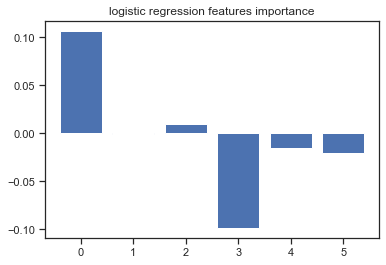

In [56]:
# plot feature importance
plt.title('logistic regression features importance')
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("logistic feature importance.png")
plt.show()

## Model II:	Decision Trees 
A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute , each branch represents the outcome of the test, and each leaf node represents a class label.

### Building Decision Tree Model

In [57]:
# Create Decision Tree classifer object
dtree_regressor= DecisionTreeClassifier()

# Train Decision Tree Classifer
dtree_regressor = dtree_regressor.fit(X_train,y_train)


In [58]:
dtree_score = get_score(dtree_regressor,X_train,X_test,y_train,y_test)

In [59]:
print("Accuracy: %.2f%%" % (dtree_score*100.0))

Accuracy: 82.43%


### model evaluation using k fold cross validation

In [60]:
dtree_trained = model_predictor(dtree_regressor, X_train, y_train)

In [61]:
dtree_kfold_score = dtree_trained.score(X_test,y_test)

In [62]:
# report performance:evaluate a logistic regression model using k-fold cross-validation
print("Accuracy: %.2f%%" % (dtree_kfold_score*100.0)) 

Accuracy: 82.18%


It is noted that the model achieved an estimated classification accuracy of about 82.0 percent.

In [63]:
y_pred_dtree = dtree_trained.predict(X_test)

#### Plot of comparing actual test set values and predicted values.

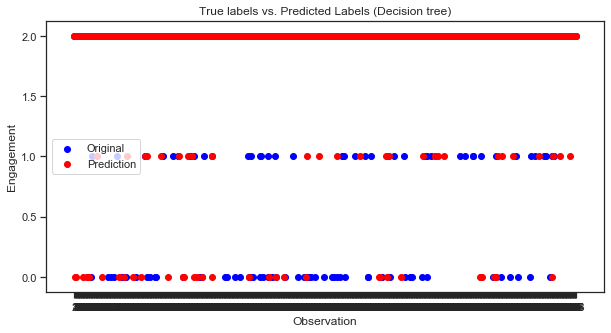

In [133]:
plot_preds(y_test,y_pred_dtree,"Decision tree")

#### Evaluating  the performance of algorithm 

In [64]:
calculate_metrics(y_test, y_pred_dtree)

RMSE Score: 0.6839749865150171
R2_Squared: -0.5346088913899829


### Feature importance

In [65]:
# get importance
importance_dtree = dtree_regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_dtree):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02218
Feature: 1, Score: 0.42129
Feature: 2, Score: 0.14493
Feature: 3, Score: 0.01207
Feature: 4, Score: 0.26276
Feature: 5, Score: 0.13677


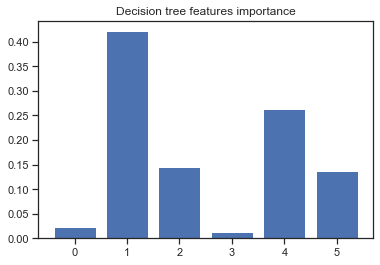

In [66]:
# plot feature importance
plt.title('Decision tree features importance')
plt.bar([x for x in range(len(importance_dtree))], importance_dtree)
plt.savefig("dtree feature importance.png")
plt.show()

## Model III:	XGBoost model(Extreme Gradient Boosting)
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.


In [114]:
# Create XGBoost classifer object
xgb_regressor= xgb.XGBClassifier()

# Train Decision Tree Classifer
xgb_regressor = xgb_regressor.fit(X_train,y_train)

In [116]:
xgb_score = get_score(xgb_regressor,X_train,X_test,y_train,y_test)

In [117]:
print("Accuracy: %.2f%%" % (xgb_score*100.0))

Accuracy: 87.25%


### model evaluation using k fold cross validation

In [118]:
xgb_trained = model_predictor(xgb_regressor, X_train, y_train)

In [119]:
xgb_kfold_score = xgb_trained.score(X_test,y_test)

In [120]:
# report performance:evaluate a logistic regression model using k-fold cross-validation
print("Accuracy: %.2f%%" % (xgb_kfold_score*100.0)) 

Accuracy: 86.76%


It is noted that the model achieved an estimated classification accuracy of about 86.0 percent.

In [121]:
y_pred_xgb= xgb_trained.predict(X_test)

#### Plot of comparing actual test set values and predicted values.

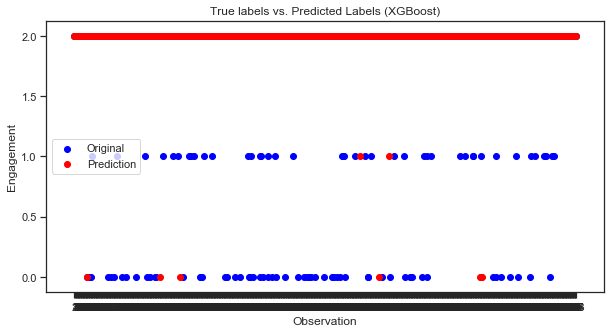

In [137]:
plot_preds(y_test,y_pred_xgb,"XGBoost")

#### Evaluating  the performance of algorithm 

In [138]:
calculate_metrics(y_test, y_pred_xgb)

RMSE Score: 0.6052574936862545
R2_Squared: -0.2017043170672883


### References


http://blog.analytics-toolkit.com/2017/statistical-significance-ab-testing-complete-guide/

https://www.business-science.io/business/2019/03/11/ab-testing-machine-learning.html

http://www.qubit.com/wp-content/uploads/2017/12/qubit-research-ab-test-results-are-illusory.pdf

https://www.datacamp.com/community/tutorials/xgboost-in-python
